<a href="https://colab.research.google.com/github/adenurchalisa/Automatic-Photo-Clustering-System-Optimization-HDBSCAN/blob/main/notebooks/3_EDA_Baseline_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LOAD EMBEDDINGS**

---



In [ ]:
# LOAD EMBEDDINGS
import numpy as np
import pickle
from google.colab import drive

drive.mount('/content/drive')
print("Drive amanmi")

Mounted at /content/drive
Drive amanmi


In [ ]:
EMBEDDINGS_PATH = "/content/drive/MyDrive/OTW S.KOM/Embeddings/embeddings_data.pkl"

In [ ]:
def load_embeddings(filepath):
  print("="*60)
  print("STEP 0: LOAD EMBEDDINGS")
  print("="*60)
  print(f"\nFile path: {filepath}")

  with open(filepath, 'rb') as f:
    data = pickle.load(f)

  embeddings = data['embeddings']
  metadata = data['metadata']
  stats = data.get('stats', {})
  no_face_images = data.get('no_face_images', [])
  error_images = data.get('error_images', [])

  if embeddings.dtype != np.float32:
    embeddings = embeddings.astype('float32')


  print(f"\n✅ Data berhasil dimuat!")

  print(f"\n📊 INFORMASI DATASET:")
  print(f"   ┌─────────────────────────────────────────")
  print(f"   │ Jumlah embeddings  : {len(embeddings):,}")
  print(f"   │ Dimensi embedding  : {embeddings.shape[1]}")
  print(f"   │ Shape array        : {embeddings.shape}")
  print(f"   │ Tipe data          : {embeddings.dtype}")
  print(f"   │ Ukuran memori      : {embeddings.nbytes / 1024 / 1024:.2f} MB")
  print(f"   └─────────────────────────────────────────")

  print(f"\n📈 STATISTIK EKSTRAKSI:")
  print(f"   ┌─────────────────────────────────────────")
  print(f"   │ Foto tanpa wajah   : {len(no_face_images)}")
  print(f"   │ Foto error         : {len(error_images)}")
  print(f"   └─────────────────────────────────────────")

  assert len(embeddings) == len(metadata), \
       f"ERROR: Jumlah embeddings ({len(embeddings)}) != metadata ({len(metadata)})"

  print(f"\n✅ Verifikasi: len(embeddings) == len(metadata)")

  print(f"\n👀 PREVIEW METADATA (3 sampel pertama):")
  print(f"   " + "-"*55)

  for i in range(min(3, len(metadata))):
      m = metadata[i]
      print(f"   [{i}] {m['image_filename']}")
      print(f"       • Wajah ke-{m['face_index']} dari {m['total_faces_in_image']} wajah")
      print(f"       • Detection score: {m['det_score']:.2%}")
      print(f"   " + "-"*55)

  return embeddings, metadata, stats

In [ ]:
def get_image_paths(metadata):
  return [m['image_path'] for m in metadata]

In [ ]:
def analyze_dataset(metadata):
  unique_images = set(m['image_path'] for m in metadata)
  n_unique_images = len(unique_images)

  print(f"\n📸 FOTO:")
  print(f"   • Total embeddings (wajah)   : {len(metadata):,}")
  print(f"   • Total foto unik            : {n_unique_images:,}")
  print(f"   • Rata-rata wajah per foto   : {len(metadata)/n_unique_images:.1f}")

  faces_per_image = {}
  for m in metadata:
      img = m['image_path']
      if img not in faces_per_image:
          faces_per_image[img] = m['total_faces_in_image']

  face_counts = list(faces_per_image.values())

  print(f"\n👥 DISTRIBUSI WAJAH PER FOTO:")
  print(f"   • Minimum   : {min(face_counts)} wajah")
  print(f"   • Maximum   : {max(face_counts)} wajah")
  print(f"   • Rata-rata : {np.mean(face_counts):.1f} wajah")
  print(f"   • Median    : {np.median(face_counts):.1f} wajah")

  # Distribusi bucket
  buckets = {
      '1 wajah': len([f for f in face_counts if f == 1]),
      '2-5 wajah': len([f for f in face_counts if 2 <= f <= 5]),
      '6-10 wajah': len([f for f in face_counts if 6 <= f <= 10]),
      '11-20 wajah': len([f for f in face_counts if 11 <= f <= 20]),
      '>20 wajah': len([f for f in face_counts if f > 20])
  }

  print(f"\n   Breakdown:")
  for bucket, count in buckets.items():
      pct = count / len(face_counts) * 100
      bar = '█' * int(pct / 2)
      print(f"   {bucket:>12}: {count:>4} foto ({pct:>5.1f}%) {bar}")

  det_scores = [m['det_score'] for m in metadata]

  print(f"\n🎯 DETECTION SCORE:")
  print(f"   • Minimum   : {min(det_scores):.2%}")
  print(f"   • Maximum   : {max(det_scores):.2%}")
  print(f"   • Rata-rata : {np.mean(det_scores):.2%}")
  print(f"   • Median    : {np.median(det_scores):.2%}")

  # Hitung low confidence detections
  low_conf = len([s for s in det_scores if s < 0.5])
  print(f"\n   ⚠️ Low confidence (<50%): {low_conf} wajah ({low_conf/len(det_scores)*100:.1f}%)")

  analysis = {
      'n_embeddings': len(metadata),
      'n_unique_images': n_unique_images,
      'avg_faces_per_image': len(metadata) / n_unique_images,
      'face_count_distribution': buckets,
      'det_score_stats': {
          'min': min(det_scores),
          'max': max(det_scores),
          'mean': np.mean(det_scores),
          'median': np.median(det_scores)
      }
  }

  return analysis

In [ ]:
if __name__ == "__main__":

    embeddings, metadata, stats = load_embeddings(EMBEDDINGS_PATH)

    analysis = analyze_dataset(metadata)

    print(f"\n" + "="*60)
    print("✅ STEP 0 COMPLETE")
    print("="*60)
    print(f"""
    Data siap untuk diproses!

    Variabel yang tersedia:
    • embeddings : numpy array {embeddings.shape}
    • metadata   : list of {len(metadata)} dictionaries
    • stats      : extraction statistics

    Next: Step 1 - Exploratory Data Analysis (EDA)
    """)

STEP 0: LOAD EMBEDDINGS

File path: /content/drive/MyDrive/OTW S.KOM/Embeddings/embeddings_data.pkl

✅ Data berhasil dimuat!

📊 INFORMASI DATASET:
   ┌─────────────────────────────────────────
   │ Jumlah embeddings  : 12,715
   │ Dimensi embedding  : 512
   │ Shape array        : (12715, 512)
   │ Tipe data          : float32
   │ Ukuran memori      : 24.83 MB
   └─────────────────────────────────────────

📈 STATISTIK EKSTRAKSI:
   ┌─────────────────────────────────────────
   │ Foto tanpa wajah   : 168
   │ Foto error         : 0
   └─────────────────────────────────────────

✅ Verifikasi: len(embeddings) == len(metadata)

👀 PREVIEW METADATA (3 sampel pertama):
   -------------------------------------------------------
   [0] DSCF0307.JPG
       • Wajah ke-0 dari 12 wajah
       • Detection score: 86.38%
   -------------------------------------------------------
   [1] DSCF0307.JPG
       • Wajah ke-1 dari 12 wajah
       • Detection score: 86.04%
   ---------------------------------

# **EXPLORATORY DATA ANALYSIS (EDA)**

---



In [ ]:
import os
os.makedirs('/content/drive/MyDrive/OTW S.KOM/ResultsEDA/', exist_ok=True)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

def check_data_quality(embeddings):
  print("\n" + "="*60)
  print("1.1 DATA QUALITY CHECK")
  print("="*60)

  issues = []

  nan_count = np.isnan(embeddings).sum()
  nan_rows = np.any(np.isnan(embeddings), axis=1).sum()
  print(f"\n   NaN values  : {nan_count:,}")
  print(f"   Rows with NaN: {nan_rows:,}")
  if nan_count > 0:
      issues.append(f"Found {nan_count} NaN values")

  inf_count = np.isinf(embeddings).sum()
  inf_rows = np.any(np.isinf(embeddings), axis=1).sum()
  print(f"\n   Inf values  : {inf_count:,}")
  print(f"   Rows with Inf: {inf_rows:,}")
  if inf_count > 0:
      issues.append(f"Found {inf_count} Inf values")

  zero_rows = np.all(embeddings == 0, axis=1).sum()
  print(f"\n   All-zero rows: {zero_rows:,}")
  if zero_rows > 0:
      issues.append(f"Found {zero_rows} all-zero rows")

  is_clean = len(issues) == 0
  if is_clean:
      print(f"\n   ✅ Data BERSIH - Tidak ada masalah ditemukan!")
  else:
      print(f"\n   ❌ Data ada MASALAH:")
      for issue in issues:
          print(f"      • {issue}")

  return is_clean


In [ ]:
def analyze_basic_statistics(embeddings):
    print("\n" + "="*60)
    print("📊 1.2 BASIC STATISTICS")
    print("="*60)

    # Overall statistics
    print(f"\n   📈 Overall Statistics:")
    print(f"   ┌─────────────────────────────────────────")
    print(f"   │ Min     : {embeddings.min():.6f}")
    print(f"   │ Max     : {embeddings.max():.6f}")
    print(f"   │ Mean    : {embeddings.mean():.6f}")
    print(f"   │ Std     : {embeddings.std():.6f}")
    print(f"   │ Median  : {np.median(embeddings):.6f}")
    print(f"   └─────────────────────────────────────────")

    # Per-dimension statistics
    dim_means = embeddings.mean(axis=0)  # Mean per kolom (512 values)
    dim_stds = embeddings.std(axis=0)    # Std per kolom (512 values)
    dim_mins = embeddings.min(axis=0)
    dim_maxs = embeddings.max(axis=0)

    print(f"\n   📏 Per-Dimension Statistics (across 512 dimensions):")
    print(f"   ┌─────────────────────────────────────────")
    print(f"   │ Dimension means  - min: {dim_means.min():.4f}, max: {dim_means.max():.4f}")
    print(f"   │ Dimension stds   - min: {dim_stds.min():.4f}, max: {dim_stds.max():.4f}")
    print(f"   └─────────────────────────────────────────")

    # Check for "dead" dimensions (variance = 0)
    dead_dims = (dim_stds == 0).sum()
    print(f"\n   🔍 'Dead' dimensions (std=0): {dead_dims}")
    if dead_dims > 0:
        print(f"      ⚠️ Ada {dead_dims} dimensi yang tidak memberikan informasi!")
    else:
        print(f"      ✅ Semua dimensi aktif (memberikan informasi)")

    stats = {
        'overall': {
            'min': embeddings.min(),
            'max': embeddings.max(),
            'mean': embeddings.mean(),
            'std': embeddings.std(),
            'median': np.median(embeddings)
        },
        'per_dimension': {
            'means': dim_means,
            'stds': dim_stds,
            'mins': dim_mins,
            'maxs': dim_maxs
        },
        'dead_dimensions': dead_dims
    }

    return stats

In [ ]:
def analyze_l2_norms(embeddings):
    print("\n" + "="*60)
    print("📏 1.3 L2 NORM ANALYSIS")
    print("="*60)

    # Hitung L2 norm untuk setiap embedding
    # axis=1 artinya hitung per baris (per embedding)
    l2_norms = np.linalg.norm(embeddings, axis=1)

    print(f"\n   L2 Norm Statistics:")
    print(f"   ┌─────────────────────────────────────────")
    print(f"   │ Min     : {l2_norms.min():.6f}")
    print(f"   │ Max     : {l2_norms.max():.6f}")
    print(f"   │ Mean    : {l2_norms.mean():.6f}")
    print(f"   │ Std     : {l2_norms.std():.6f}")
    print(f"   └─────────────────────────────────────────")

    # Check if normalized (semua norm ≈ 1)
    is_normalized = np.allclose(l2_norms, 1.0, atol=0.01)

    if is_normalized:
        print(f"\n   ✅ Embeddings SUDAH L2-normalized!")
        print(f"      → Semua vektor memiliki panjang ≈ 1")
        print(f"      → Euclidean distance akan proporsional dengan Cosine distance")
        print(f"      → Tidak perlu normalisasi tambahan")
    else:
        print(f"\n   ℹ️ Embeddings BELUM L2-normalized")
        print(f"      → Panjang vektor bervariasi dari {l2_norms.min():.4f} sampai {l2_norms.max():.4f}")
        print(f"      → Bisa coba normalisasi jika hasil clustering kurang baik")

    return l2_norms, is_normalized

In [ ]:
def analyze_pairwise_distances(embeddings, sample_size=1000):
    print("\n" + "="*60)
    print("📐 1.4 PAIRWISE DISTANCE ANALYSIS")
    print("="*60)

    print(f"\n   ⚙️ Sampling {sample_size:,} embeddings untuk analisis...")
    print(f"      (Menghitung semua {len(embeddings):,}² = {len(embeddings)**2:,} pasangan terlalu berat)")

    # Random sample
    np.random.seed(42)  # Untuk reproducibility
    sample_idx = np.random.choice(len(embeddings),
                                   min(sample_size, len(embeddings)),
                                   replace=False)
    sample_emb = embeddings[sample_idx]

    # Hitung pairwise distances
    print(f"   ⏳ Menghitung jarak antar {len(sample_emb):,} embeddings...")
    distances = pairwise_distances(sample_emb, metric='euclidean')

    # Ambil upper triangle (tanpa diagonal)
    # Karena distance matrix simetris dan diagonal = 0
    upper_tri_idx = np.triu_indices_from(distances, k=1)
    pairwise_dists = distances[upper_tri_idx]

    print(f"   ✅ Selesai! Menganalisis {len(pairwise_dists):,} pasangan jarak")

    # Statistics
    print(f"\n   📊 Pairwise Distance Statistics (Euclidean):")
    print(f"   ┌─────────────────────────────────────────")
    print(f"   │ Min        : {pairwise_dists.min():.4f}")
    print(f"   │ Max        : {pairwise_dists.max():.4f}")
    print(f"   │ Mean       : {pairwise_dists.mean():.4f}")
    print(f"   │ Median     : {np.median(pairwise_dists):.4f}")
    print(f"   │ Std        : {pairwise_dists.std():.4f}")
    print(f"   │ Percentile 25%: {np.percentile(pairwise_dists, 25):.4f}")
    print(f"   │ Percentile 75%: {np.percentile(pairwise_dists, 75):.4f}")
    print(f"   └─────────────────────────────────────────")

    # Insight untuk HDBSCAN
    print(f"\n   💡 Insight untuk HDBSCAN:")
    print(f"      • Jarak minimum: {pairwise_dists.min():.4f}")
    print(f"        → Embeddings terdekat (mungkin wajah yang sama)")
    print(f"      • Jarak median: {np.median(pairwise_dists):.4f}")
    print(f"        → Jarak 'tipikal' antar embeddings")
    print(f"      • Jarak maximum: {pairwise_dists.max():.4f}")
    print(f"        → Embeddings terjauh (wajah sangat berbeda)")

    distance_stats = {
        'min': pairwise_dists.min(),
        'max': pairwise_dists.max(),
        'mean': pairwise_dists.mean(),
        'median': np.median(pairwise_dists),
        'std': pairwise_dists.std(),
        'percentile_25': np.percentile(pairwise_dists, 25),
        'percentile_75': np.percentile(pairwise_dists, 75),
        'all_distances': pairwise_dists  # Untuk plotting
    }

    return distance_stats

In [ ]:
def plot_eda_results(embeddings, l2_norms, distance_stats, save_path=None):
    print("\n" + "="*60)
    print("📊 1.5 VISUALIZATION")
    print("="*60)
    print("\n   ⏳ Generating plots...")

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # -------------------------------------------------------------------------
    # Plot 1: Distribusi L2 Norms
    # -------------------------------------------------------------------------
    ax1 = axes[0, 0]
    ax1.hist(l2_norms, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
    ax1.axvline(x=l2_norms.mean(), color='red', linestyle='--',
                label=f'Mean: {l2_norms.mean():.4f}')
    ax1.axvline(x=1.0, color='green', linestyle='--',
                label='Normalized (1.0)', alpha=0.7)
    ax1.set_xlabel('L2 Norm')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Distribution of L2 Norms')
    ax1.legend()

    # -------------------------------------------------------------------------
    # Plot 2: Distribusi Pairwise Distances
    # -------------------------------------------------------------------------
    ax2 = axes[0, 1]
    pairwise_dists = distance_stats['all_distances']
    ax2.hist(pairwise_dists, bins=50, edgecolor='black', alpha=0.7, color='coral')
    ax2.axvline(x=distance_stats['median'], color='blue', linestyle='--',
                label=f'Median: {distance_stats["median"]:.4f}')
    ax2.axvline(x=distance_stats['mean'], color='red', linestyle='--',
                label=f'Mean: {distance_stats["mean"]:.4f}')
    ax2.set_xlabel('Euclidean Distance')
    ax2.set_ylabel('Frequency')
    ax2.set_title('Distribution of Pairwise Distances (sample)')
    ax2.legend()

    # -------------------------------------------------------------------------
    # Plot 3: Sample Distance Matrix Heatmap
    # -------------------------------------------------------------------------
    ax3 = axes[1, 0]

    # Sample kecil untuk heatmap (50x50)
    np.random.seed(42)
    heatmap_idx = np.random.choice(len(embeddings), min(50, len(embeddings)), replace=False)
    heatmap_emb = embeddings[heatmap_idx]
    heatmap_dist = pairwise_distances(heatmap_emb, metric='euclidean')

    im = ax3.imshow(heatmap_dist, cmap='viridis', aspect='auto')
    plt.colorbar(im, ax=ax3, label='Euclidean Distance')
    ax3.set_xlabel('Embedding Index')
    ax3.set_ylabel('Embedding Index')
    ax3.set_title('Sample Distance Matrix (50×50)')

    # -------------------------------------------------------------------------
    # Plot 4: Embedding Value Distribution (sample dimensions)
    # -------------------------------------------------------------------------
    ax4 = axes[1, 1]

    # Sample 10 dimensi untuk boxplot
    dim_sample = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450]
    data_for_boxplot = [embeddings[:, d] for d in dim_sample]

    bp = ax4.boxplot(data_for_boxplot, labels=[f'd{d}' for d in dim_sample])
    ax4.set_xlabel('Dimension')
    ax4.set_ylabel('Value')
    ax4.set_title('Value Distribution (sample 10 dimensions)')
    ax4.axhline(y=0, color='gray', linestyle='--', alpha=0.5)

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=150, bbox_inches='tight')
        print(f"   💾 Plot saved to: {save_path}")

    plt.show()
    print("   ✅ Plots generated!")

In [ ]:
def run_eda(embeddings, save_plots=True, plot_path=None):
    print("\n" + "="*60)
    print("🔬 STEP 1: EXPLORATORY DATA ANALYSIS (EDA)")
    print("="*60)
    print(f"\n   Analyzing {len(embeddings):,} embeddings × {embeddings.shape[1]} dimensions")

    # 1.1 Data Quality Check
    is_clean = check_data_quality(embeddings)

    # 1.2 Basic Statistics
    basic_stats = analyze_basic_statistics(embeddings)

    # 1.3 L2 Norm Analysis
    l2_norms, is_normalized = analyze_l2_norms(embeddings)

    # 1.4 Pairwise Distance Analysis
    distance_stats = analyze_pairwise_distances(embeddings, sample_size=1000)

    # 1.5 Visualization (optional)
    if save_plots:
        plot_eda_results(embeddings, l2_norms, distance_stats, save_path=plot_path)

    # Compile results
    eda_results = {
        'is_clean': is_clean,
        'basic_stats': basic_stats,
        'l2_norms': l2_norms,
        'is_normalized': is_normalized,
        'distance_stats': distance_stats
    }

    # Summary
    print("\n" + "="*60)
    print("📋 EDA SUMMARY")
    print("="*60)
    print(f"""
    ┌─────────────────────────────────────────────────────────────┐
    │                    EDA RESULTS                              │
    ├─────────────────────────────────────────────────────────────┤
    │                                                             │
    │  Data Quality     : {'✅ CLEAN' if is_clean else '❌ HAS ISSUES'}                              │
    │  L2 Normalized    : {'✅ YES' if is_normalized else '❌ NO'}                                │
    │                                                             │
    │  Embedding Values:                                          │
    │    Range: [{basic_stats['overall']['min']:.4f}, {basic_stats['overall']['max']:.4f}]                        │
    │    Mean : {basic_stats['overall']['mean']:.4f}                                     │
    │    Std  : {basic_stats['overall']['std']:.4f}                                     │
    │                                                             │
    │  Pairwise Distances (Euclidean):                            │
    │    Range : [{distance_stats['min']:.4f}, {distance_stats['max']:.4f}]                       │
    │    Median: {distance_stats['median']:.4f}                                    │
    │                                                             │
    └─────────────────────────────────────────────────────────────┘
    """)

    # Recommendations
    print("   💡 RECOMMENDATIONS FOR CLUSTERING:")

    if is_normalized:
        print("      • Data sudah normalized - langsung pakai Euclidean distance")
        print("      • Cosine distance juga akan memberikan hasil serupa")
    else:
        print("      • Pertimbangkan normalisasi jika hasil kurang baik")
        print("      • Atau langsung coba HDBSCAN dengan data asli dulu")

    print(f"\n   ✅ STEP 1 COMPLETE - Data siap untuk Step 2 (Baseline Clustering)")

    return eda_results

In [ ]:
if __name__ == "__main__":
  pass


🔬 STEP 1: EXPLORATORY DATA ANALYSIS (EDA)

   Analyzing 12,715 embeddings × 512 dimensions

1.1 DATA QUALITY CHECK

   NaN values  : 0
   Rows with NaN: 0

   Inf values  : 0
   Rows with Inf: 0

   All-zero rows: 0

   ✅ Data BERSIH - Tidak ada masalah ditemukan!

📊 1.2 BASIC STATISTICS

   📈 Overall Statistics:
   ┌─────────────────────────────────────────
   │ Min     : -5.832338
   │ Max     : 6.026939
   │ Mean    : 0.003600
   │ Std     : 0.957149
   │ Median  : 0.003580
   └─────────────────────────────────────────

   📏 Per-Dimension Statistics (across 512 dimensions):
   ┌─────────────────────────────────────────
   │ Dimension means  - min: -0.8566, max: 0.7601
   │ Dimension stds   - min: 0.7843, max: 1.1231
   └─────────────────────────────────────────

   🔍 'Dead' dimensions (std=0): 0
      ✅ Semua dimensi aktif (memberikan informasi)

📏 1.3 L2 NORM ANALYSIS

   L2 Norm Statistics:
   ┌─────────────────────────────────────────
   │ Min     : 6.293501
   │ Max     : 30.14

/tmp/ipython-input-223/2666072493.py:64: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax4.boxplot(data_for_boxplot, labels=[f'd{d}' for d in dim_sample])


   💾 Plot saved to: /content/drive/MyDrive/OTW S.KOM/ResultsEDA/eda_plots.png


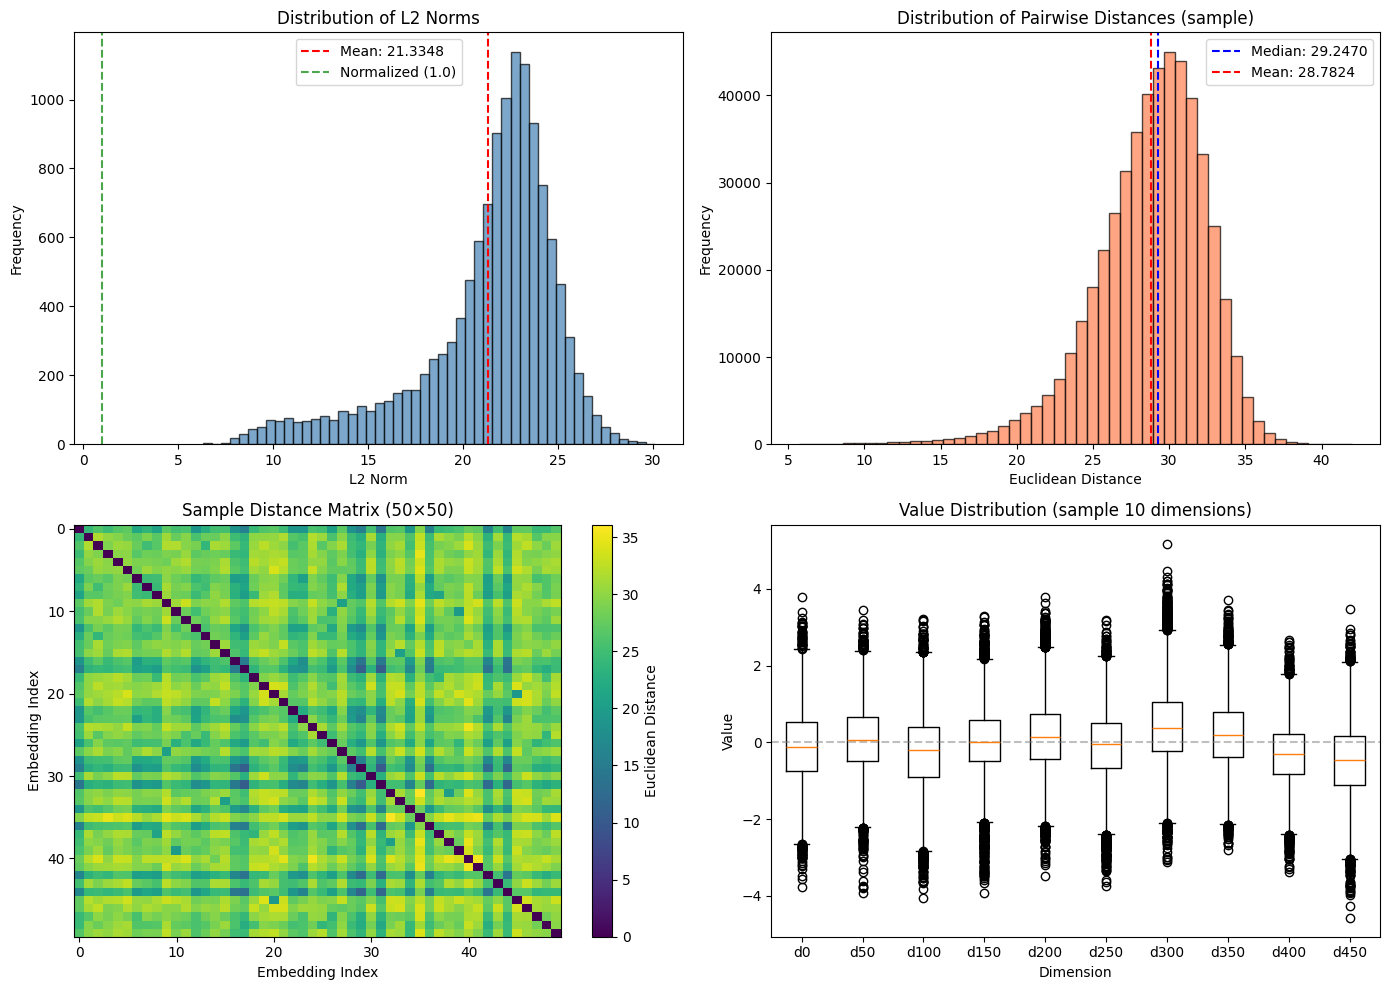

   ✅ Plots generated!

📋 EDA SUMMARY

    ┌─────────────────────────────────────────────────────────────┐
    │                    EDA RESULTS                              │
    ├─────────────────────────────────────────────────────────────┤
    │                                                             │
    │  Data Quality     : ✅ CLEAN                              │
    │  L2 Normalized    : ❌ NO                                │
    │                                                             │
    │  Embedding Values:                                          │
    │    Range: [-5.8323, 6.0269]                        │
    │    Mean : 0.0036                                     │
    │    Std  : 0.9571                                     │
    │                                                             │
    │  Pairwise Distances (Euclidean):                            │
    │    Range : [5.7073, 42.0199]                       │
    │    Median: 29.2470                         

In [ ]:
eda_results = run_eda(
    embeddings,
    save_plots=True,
    plot_path='/content/drive/MyDrive/OTW S.KOM/ResultsEDA/eda_plots.png'
)

# **BASELINE CLUSTERING (SEBELUM HYPERPARAMETER)**

---



In [ ]:
!pip install hdbscan -q

In [ ]:
import hdbscan
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import normalize
from collections import Counter
import time

/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


In [ ]:
def prepare_embeddings(embeddings):
    print("\n" + "="*60)
    print("🔧 2.1 PREPARE EMBEDDINGS")
    print("="*60)

    original = embeddings

    # Normalized - L2 normalization
    # normalize() dari sklearn otomatis melakukan L2 normalization per baris
    normalized = normalize(embeddings, norm='l2')

    # Verifikasi normalisasi berhasil
    norms_original = np.linalg.norm(original, axis=1)
    norms_normalized = np.linalg.norm(normalized, axis=1)

    print(f"\n   📊 Original Embeddings:")
    print(f"      L2 norms - Min: {norms_original.min():.4f}, Max: {norms_original.max():.4f}")
    print(f"      Shape: {original.shape}")

    print(f"\n   📊 Normalized Embeddings:")
    print(f"      L2 norms - Min: {norms_normalized.min():.4f}, Max: {norms_normalized.max():.4f}")
    print(f"      Shape: {normalized.shape}")
    print(f"      ✅ Semua vektor sekarang memiliki panjang = 1")

    return original, normalized

In [ ]:
def run_hdbscan_single(embeddings, min_cluster_size=5, min_samples=None,
                       metric='euclidean', name=''):
    print(f"\n   🔄 Running HDBSCAN ({name})...")
    print(f"      Parameters: min_cluster_size={min_cluster_size}, min_samples={min_samples}, metric={metric}")

    start_time = time.time()

    # Inisialisasi HDBSCAN
    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=min_cluster_size,
        min_samples=min_samples,
        metric=metric,
        core_dist_n_jobs=-1  # Gunakan semua CPU cores
    )

    # Fit dan predict
    labels = clusterer.fit_predict(embeddings)

    runtime = time.time() - start_time

    # Analisis hasil
    cluster_counts = Counter(labels)
    n_clusters = len([k for k in cluster_counts.keys() if k != -1])
    n_noise = cluster_counts.get(-1, 0)
    noise_ratio = n_noise / len(labels)

    # Evaluasi (hanya jika ada minimal 2 cluster dan tidak semua noise)
    mask = labels != -1
    if mask.sum() > 0 and len(np.unique(labels[mask])) >= 2:
        silhouette = silhouette_score(embeddings[mask], labels[mask])
        dbi = davies_bouldin_score(embeddings[mask], labels[mask])
    else:
        silhouette = -1.0
        dbi = float('inf')

    # Compile result
    result = {
        'name': name,
        'labels': labels,
        'n_clusters': n_clusters,
        'n_noise': n_noise,
        'noise_ratio': noise_ratio,
        'silhouette': silhouette,
        'dbi': dbi,
        'cluster_counts': cluster_counts,
        'runtime': runtime,
        'params': {
            'min_cluster_size': min_cluster_size,
            'min_samples': min_samples,
            'metric': metric
        }
    }

    print(f"      ✅ Done in {runtime:.2f}s")
    print(f"      Clusters: {n_clusters}, Noise: {n_noise} ({noise_ratio:.1%})")
    print(f"      Silhouette: {silhouette:.4f}, DBI: {dbi:.4f}")

    return result

In [ ]:
def compare_baseline_results(result_original, result_normalized):
    print("\n" + "="*60)
    print("📊 2.3 COMPARISON: ORIGINAL vs NORMALIZED")
    print("="*60)

    # Table comparison
    print(f"""
    ┌────────────────────┬──────────────────┬──────────────────┐
    │      Metric        │     ORIGINAL     │    NORMALIZED    │
    ├────────────────────┼──────────────────┼──────────────────┤
    │ Clusters           │ {result_original['n_clusters']:>16} │ {result_normalized['n_clusters']:>16} │
    │ Noise Points       │ {result_original['n_noise']:>16,} │ {result_normalized['n_noise']:>16,} │
    │ Noise Ratio        │ {result_original['noise_ratio']:>15.1%} │ {result_normalized['noise_ratio']:>15.1%} │
    │ Silhouette Score ↑ │ {result_original['silhouette']:>16.4f} │ {result_normalized['silhouette']:>16.4f} │
    │ Davies-Bouldin ↓   │ {result_original['dbi']:>16.4f} │ {result_normalized['dbi']:>16.4f} │
    │ Runtime (s)        │ {result_original['runtime']:>16.2f} │ {result_normalized['runtime']:>16.2f} │
    └────────────────────┴──────────────────┴──────────────────┘

    ↑ = higher is better, ↓ = lower is better
    """)

    # Determine winner
    score_original = 0
    score_normalized = 0

    # Compare Silhouette (higher is better)
    if result_original['silhouette'] > result_normalized['silhouette']:
        score_original += 2
        sil_winner = "ORIGINAL"
    elif result_normalized['silhouette'] > result_original['silhouette']:
        score_normalized += 2
        sil_winner = "NORMALIZED"
    else:
        sil_winner = "TIE"

    # Compare DBI (lower is better)
    if result_original['dbi'] < result_normalized['dbi']:
        score_original += 2
        dbi_winner = "ORIGINAL"
    elif result_normalized['dbi'] < result_original['dbi']:
        score_normalized += 2
        dbi_winner = "NORMALIZED"
    else:
        dbi_winner = "TIE"

    # Compare noise ratio (lower is generally better, but not always)
    if result_original['noise_ratio'] < result_normalized['noise_ratio']:
        score_original += 1
        noise_winner = "ORIGINAL"
    elif result_normalized['noise_ratio'] < result_original['noise_ratio']:
        score_normalized += 1
        noise_winner = "NORMALIZED"
    else:
        noise_winner = "TIE"

    print(f"   📈 Metric-by-Metric Winner:")
    print(f"      • Silhouette Score: {sil_winner}")
    print(f"      • Davies-Bouldin  : {dbi_winner}")
    print(f"      • Noise Ratio     : {noise_winner}")

    print(f"\n   🏆 Overall Score:")
    print(f"      • ORIGINAL  : {score_original} points")
    print(f"      • NORMALIZED: {score_normalized} points")

    # Recommendation
    if score_original > score_normalized:
        recommendation = "ORIGINAL"
        print(f"\n   ✅ RECOMMENDATION: Use ORIGINAL embeddings")
    elif score_normalized > score_original:
        recommendation = "NORMALIZED"
        print(f"\n   ✅ RECOMMENDATION: Use NORMALIZED embeddings")
    else:
        # Jika seri, prioritaskan Silhouette Score
        if result_normalized['silhouette'] >= result_original['silhouette']:
            recommendation = "NORMALIZED"
            print(f"\n   ✅ RECOMMENDATION: Use NORMALIZED (tie-breaker: Silhouette)")
        else:
            recommendation = "ORIGINAL"
            print(f"\n   ✅ RECOMMENDATION: Use ORIGINAL (tie-breaker: Silhouette)")

    comparison = {
        'silhouette_winner': sil_winner,
        'dbi_winner': dbi_winner,
        'noise_winner': noise_winner,
        'score_original': score_original,
        'score_normalized': score_normalized,
        'recommendation': recommendation
    }

    return comparison, recommendation


In [ ]:
def analyze_cluster_distribution(result, minority_threshold=10):
    print(f"\n" + "="*60)
    print(f"📊 2.4 CLUSTER DISTRIBUTION ANALYSIS ({result['name']})")
    print("="*60)

    cluster_counts = result['cluster_counts']

    # Separate noise from actual clusters
    noise_count = cluster_counts.get(-1, 0)
    valid_clusters = {k: v for k, v in cluster_counts.items() if k != -1}

    if not valid_clusters:
        print("\n   ❌ No valid clusters found!")
        return None

    sizes = list(valid_clusters.values())

    print(f"\n   📊 Overall Statistics:")
    print(f"      Total clusters : {len(valid_clusters)}")
    print(f"      Total in clusters: {sum(sizes):,}")
    print(f"      Noise points   : {noise_count:,}")

    print(f"\n   📏 Cluster Size Statistics:")
    print(f"      Min     : {min(sizes)}")
    print(f"      Max     : {max(sizes)}")
    print(f"      Mean    : {np.mean(sizes):.1f}")
    print(f"      Median  : {np.median(sizes):.1f}")
    print(f"      Std     : {np.std(sizes):.1f}")

    # Size distribution buckets
    buckets = {
        '1-5 (very small)': len([s for s in sizes if 1 <= s <= 5]),
        '6-10 (small)': len([s for s in sizes if 6 <= s <= 10]),
        '11-20 (medium)': len([s for s in sizes if 11 <= s <= 20]),
        '21-50 (large)': len([s for s in sizes if 21 <= s <= 50]),
        '>50 (very large)': len([s for s in sizes if s > 50])
    }

    print(f"\n   📊 Size Distribution:")
    for bucket, count in buckets.items():
        if len(sizes) > 0:
            pct = count / len(sizes) * 100
            bar = '█' * int(pct / 3)
            print(f"      {bucket:20}: {count:>4} clusters ({pct:>5.1f}%) {bar}")

    # Identify minority clusters
    minority_clusters = {k: v for k, v in valid_clusters.items() if v <= minority_threshold}
    majority_clusters = {k: v for k, v in valid_clusters.items() if v > minority_threshold}

    print(f"\n   🔍 Minority Clusters (size ≤ {minority_threshold}):")
    print(f"      Count: {len(minority_clusters)} / {len(valid_clusters)} ({len(minority_clusters)/len(valid_clusters)*100:.1f}%)")

    if minority_clusters:
        total_minority_samples = sum(minority_clusters.values())
        print(f"      Total samples in minority: {total_minority_samples:,}")

        # Show some examples
        print(f"\n      Examples (showing up to 10):")
        for i, (cid, size) in enumerate(sorted(minority_clusters.items(), key=lambda x: x[1])):
            if i >= 10:
                print(f"         ... and {len(minority_clusters) - 10} more")
                break
            print(f"         Cluster {cid}: {size} samples")

    print(f"\n   📊 Majority Clusters (size > {minority_threshold}):")
    print(f"      Count: {len(majority_clusters)} / {len(valid_clusters)} ({len(majority_clusters)/len(valid_clusters)*100:.1f}%)")

    analysis = {
        'n_clusters': len(valid_clusters),
        'noise_count': noise_count,
        'sizes': sizes,
        'min_size': min(sizes),
        'max_size': max(sizes),
        'mean_size': np.mean(sizes),
        'median_size': np.median(sizes),
        'buckets': buckets,
        'minority_clusters': minority_clusters,
        'majority_clusters': majority_clusters,
        'minority_threshold': minority_threshold
    }

    return analysis

In [ ]:
def run_baseline_clustering(embeddings, min_cluster_size=5, min_samples=None):
    print("\n" + "="*60)
    print("🎯 STEP 2: BASELINE CLUSTERING")
    print("="*60)
    print(f"\n   Parameters:")
    print(f"   • min_cluster_size: {min_cluster_size}")
    print(f"   • min_samples: {min_samples if min_samples else 'None (=min_cluster_size)'}")
    print(f"   • metric: euclidean")

    # 2.1 Prepare embeddings
    original, normalized = prepare_embeddings(embeddings)

    # 2.2 Run HDBSCAN on both
    print("\n" + "-"*60)
    print("   Running HDBSCAN...")
    print("-"*60)

    result_original = run_hdbscan_single(
        original,
        min_cluster_size=min_cluster_size,
        min_samples=min_samples,
        metric='euclidean',
        name='ORIGINAL'
    )

    result_normalized = run_hdbscan_single(
        normalized,
        min_cluster_size=min_cluster_size,
        min_samples=min_samples,
        metric='euclidean',
        name='NORMALIZED'
    )

    # 2.3 Compare results
    comparison, recommendation = compare_baseline_results(result_original, result_normalized)

    # 2.4 Analyze cluster distribution for the recommended one
    if recommendation == "ORIGINAL":
        best_result = result_original
        best_embeddings = original
    else:
        best_result = result_normalized
        best_embeddings = normalized

    cluster_analysis = analyze_cluster_distribution(best_result, minority_threshold=10)

    # Summary
    print("\n" + "="*60)
    print("📋 STEP 2 SUMMARY")
    print("="*60)

    print(f"""
    ┌─────────────────────────────────────────────────────────────┐
    │                 BASELINE CLUSTERING RESULTS                 │
    ├─────────────────────────────────────────────────────────────┤
    │                                                             │
    │  🏆 RECOMMENDED: {recommendation:10}                             │
    │                                                             │
    │  Best Configuration:                                        │
    │    Clusters      : {best_result['n_clusters']}                                       │
    │    Noise         : {best_result['noise_ratio']:.1%}                                      │
    │    Silhouette    : {best_result['silhouette']:.4f}                                 │
    │    DBI           : {best_result['dbi']:.4f}                                 │
    │                                                             │
    │  Minority Clusters: {len(cluster_analysis['minority_clusters']) if cluster_analysis else 'N/A'}                                   │
    │                                                             │
    │  ➡️  Next: Step 3 - Hyperparameter Tuning                    │
    │                                                             │
    └─────────────────────────────────────────────────────────────┘
    """)

    results = {
        'original': {
            'embeddings': original,
            'result': result_original
        },
        'normalized': {
            'embeddings': normalized,
            'result': result_normalized
        },
        'comparison': comparison,
        'recommendation': recommendation,
        'best_result': best_result,
        'best_embeddings': best_embeddings,
        'cluster_analysis': cluster_analysis
    }

    return results

In [ ]:
if __name__ == "__main__":
  pass

In [ ]:
baseline_results = run_baseline_clustering(embeddings, min_cluster_size=5)


🎯 STEP 2: BASELINE CLUSTERING

   Parameters:
   • min_cluster_size: 5
   • min_samples: None (=min_cluster_size)
   • metric: euclidean

🔧 2.1 PREPARE EMBEDDINGS

   📊 Original Embeddings:
      L2 norms - Min: 6.2935, Max: 30.1433
      Shape: (12715, 512)

   📊 Normalized Embeddings:
      L2 norms - Min: 1.0000, Max: 1.0000
      Shape: (12715, 512)
      ✅ Semua vektor sekarang memiliki panjang = 1

------------------------------------------------------------
   Running HDBSCAN...
------------------------------------------------------------

   🔄 Running HDBSCAN (ORIGINAL)...
      Parameters: min_cluster_size=5, min_samples=None, metric=euclidean
      ✅ Done in 189.68s
      Clusters: 120, Noise: 5470 (43.0%)
      Silhouette: 0.2690, DBI: 1.3675

   🔄 Running HDBSCAN (NORMALIZED)...
      Parameters: min_cluster_size=5, min_samples=None, metric=euclidean
      ✅ Done in 187.60s
      Clusters: 111, Noise: 2137 (16.8%)
      Silhouette: 0.2292, DBI: 1.5989

📊 2.3 COMPARISON: OR

# **HYPERPARAMETER TUNING**

In [ ]:
# Cek versi CUDA yang tersedia di Colab
!nvcc --version

# Install RAPIDS cuML
# Untuk Colab dengan CUDA 11.x (T4 GPU biasanya CUDA 11.8)
!pip install --extra-index-url=https://pypi.nvidia.com cudf-cu11 cuml-cu11 pylibraft-cu11 raft-dask-cu11 -q

print("\n✅ RAPIDS cuML installed!")

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2025 NVIDIA Corporation
Built on Fri_Feb_21_20:23:50_PST_2025
Cuda compilation tools, release 12.8, V12.8.93
Build cuda_12.8.r12.8/compiler.35583870_0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 213.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 855.0/855.0 kB 226.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.5/318.5 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 203.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 445.9/445.9 MB 78.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 145.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.7/27.7 MB 224.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 237.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 MB 130.1 MB/s 

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def get_parameter_grid():
    param_grid = {
        'min_cluster_size': [3, 5, 7, 10, 15, 20, 25, 30],
        'min_samples': [1, 2, 3, 5, 7, 10]
    }
    total_combinations = len(param_grid['min_cluster_size']) * len(param_grid['min_samples'])

    print(f"\n📋 Parameter Grid:")
    print(f"   • min_cluster_size: {param_grid['min_cluster_size']}")
    print(f"   • min_samples: {param_grid['min_samples']}")
    print(f"   • Total combinations: {total_combinations}")

    return param_grid

In [ ]:
def run_grid_search(embeddings, param_grid, metric='euclidean'):
    print("\n" + "="*60)
    print("🔧 STEP 3.2: RUNNING GRID SEARCH")
    print("="*60)

    mcs_values = param_grid['min_cluster_size']
    ms_values = param_grid['min_samples']
    total = len(mcs_values) * len(ms_values)

    print(f"\n   Total combinations to try: {total}")
    print(f"   Estimated time: ~{total * 5 / 60:.1f} - {total * 15 / 60:.1f} minutes")

    results = []
    start_time = time.time()

    # Print header
    print(f"\n   {'#':<4} {'mcs':<6} {'ms':<6} {'Clusters':<10} {'Noise%':<10} {'Silhouette':<12} {'DBI':<12} {'Time':<8}")
    print("   " + "-"*76)

    iteration = 0
    for mcs in mcs_values:
        for ms in ms_values:
            iteration += 1
            iter_start = time.time()

            # Run HDBSCAN
            clusterer = hdbscan.HDBSCAN(
                min_cluster_size=mcs,
                min_samples=ms,
                metric=metric,
                core_dist_n_jobs=-1
            )
            labels = clusterer.fit_predict(embeddings)

            # Analyze results
            cluster_counts = Counter(labels)
            n_clusters = len([k for k in cluster_counts.keys() if k != -1])
            n_noise = cluster_counts.get(-1, 0)
            noise_ratio = n_noise / len(labels)

            # Evaluate
            mask = labels != -1
            if mask.sum() > 0 and len(np.unique(labels[mask])) >= 2:
                silhouette = silhouette_score(embeddings[mask], labels[mask])
                dbi = davies_bouldin_score(embeddings[mask], labels[mask])
            else:
                silhouette = -1.0
                dbi = float('inf')

            iter_time = time.time() - iter_start

            # Store result
            result = {
                'min_cluster_size': mcs,
                'min_samples': ms,
                'n_clusters': n_clusters,
                'n_noise': n_noise,
                'noise_ratio': noise_ratio,
                'silhouette': silhouette,
                'dbi': dbi,
                'labels': labels,
                'cluster_counts': cluster_counts,
                'runtime': iter_time
            }
            results.append(result)

            # Print progress
            print(f"   {iteration:<4} {mcs:<6} {ms:<6} {n_clusters:<10} {noise_ratio:<10.1%} {silhouette:<12.4f} {dbi:<12.4f} {iter_time:<8.2f}s")

    total_time = time.time() - start_time
    print("   " + "-"*76)
    print(f"\n   ✅ Grid search completed in {total_time:.2f}s ({total_time/60:.2f} min)")

    return results

In [ ]:
def analyze_grid_search_results(results):
    print("\n" + "="*60)
    print("📊 STEP 3.3: ANALYZING RESULTS")
    print("="*60)

    # Filter valid results (silhouette > -1)
    valid_results = [r for r in results if r['silhouette'] > -1]
    print(f"\n   Valid configurations: {len(valid_results)} / {len(results)}")

    if not valid_results:
        print("   ❌ No valid results found!")
        return None

    # -------------------------------------------------------------------------
    # Find Best by Silhouette (higher is better)
    # -------------------------------------------------------------------------
    best_silhouette = max(valid_results, key=lambda x: x['silhouette'])

    print(f"\n   🏆 BEST BY SILHOUETTE SCORE:")
    print(f"      Parameters: min_cluster_size={best_silhouette['min_cluster_size']}, min_samples={best_silhouette['min_samples']}")
    print(f"      Silhouette: {best_silhouette['silhouette']:.4f}")
    print(f"      DBI: {best_silhouette['dbi']:.4f}")
    print(f"      Clusters: {best_silhouette['n_clusters']}, Noise: {best_silhouette['noise_ratio']:.1%}")

    # -------------------------------------------------------------------------
    # Find Best by DBI (lower is better)
    # -------------------------------------------------------------------------
    best_dbi = min(valid_results, key=lambda x: x['dbi'])

    print(f"\n   🏆 BEST BY DAVIES-BOULDIN INDEX:")
    print(f"      Parameters: min_cluster_size={best_dbi['min_cluster_size']}, min_samples={best_dbi['min_samples']}")
    print(f"      Silhouette: {best_dbi['silhouette']:.4f}")
    print(f"      DBI: {best_dbi['dbi']:.4f}")
    print(f"      Clusters: {best_dbi['n_clusters']}, Noise: {best_dbi['noise_ratio']:.1%}")

    # -------------------------------------------------------------------------
    # Find Best Balanced (normalized score)
    # -------------------------------------------------------------------------
    # Normalize scores untuk kombinasi
    sil_values = [r['silhouette'] for r in valid_results]
    dbi_values = [r['dbi'] for r in valid_results]
    noise_values = [r['noise_ratio'] for r in valid_results]

    sil_min, sil_max = min(sil_values), max(sil_values)
    dbi_min, dbi_max = min(dbi_values), max(dbi_values)
    noise_min, noise_max = min(noise_values), max(noise_values)

    # Calculate balanced score for each result
    for r in valid_results:
        # Normalize each metric to 0-1 range
        sil_norm = (r['silhouette'] - sil_min) / (sil_max - sil_min + 1e-10)  # Higher is better
        dbi_norm = 1 - (r['dbi'] - dbi_min) / (dbi_max - dbi_min + 1e-10)      # Lower is better, so invert
        noise_norm = 1 - (r['noise_ratio'] - noise_min) / (noise_max - noise_min + 1e-10)  # Lower is better

        # Weighted combination (Silhouette paling penting)
        r['balanced_score'] = 0.5 * sil_norm + 0.3 * dbi_norm + 0.2 * noise_norm

    best_balanced = max(valid_results, key=lambda x: x['balanced_score'])

    print(f"\n   🏆 BEST BALANCED (weighted combination):")
    print(f"      Parameters: min_cluster_size={best_balanced['min_cluster_size']}, min_samples={best_balanced['min_samples']}")
    print(f"      Silhouette: {best_balanced['silhouette']:.4f}")
    print(f"      DBI: {best_balanced['dbi']:.4f}")
    print(f"      Clusters: {best_balanced['n_clusters']}, Noise: {best_balanced['noise_ratio']:.1%}")
    print(f"      Balanced Score: {best_balanced['balanced_score']:.4f}")

    analysis = {
        'best_silhouette': best_silhouette,
        'best_dbi': best_dbi,
        'best_balanced': best_balanced,
        'all_results': valid_results
    }

    return analysis

In [ ]:
def visualize_grid_search(results, save_path=None):
    import matplotlib.pyplot as plt

    print("\n" + "="*60)
    print("📊 STEP 3.4: VISUALIZING RESULTS")
    print("="*60)

    # Get unique parameter values
    mcs_values = sorted(set(r['min_cluster_size'] for r in results))
    ms_values = sorted(set(r['min_samples'] for r in results))

    # Create matrices for heatmaps
    sil_matrix = np.zeros((len(ms_values), len(mcs_values)))
    dbi_matrix = np.zeros((len(ms_values), len(mcs_values)))

    for r in results:
        i = ms_values.index(r['min_samples'])
        j = mcs_values.index(r['min_cluster_size'])
        sil_matrix[i, j] = r['silhouette'] if r['silhouette'] > -1 else np.nan
        dbi_matrix[i, j] = r['dbi'] if r['dbi'] < float('inf') else np.nan

    # Create figure
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))

    # -------------------------------------------------------------------------
    # Plot 1: Silhouette Heatmap
    # -------------------------------------------------------------------------
    ax1 = axes[0, 0]
    im1 = ax1.imshow(sil_matrix, cmap='RdYlGn', aspect='auto')
    ax1.set_xticks(range(len(mcs_values)))
    ax1.set_xticklabels(mcs_values)
    ax1.set_yticks(range(len(ms_values)))
    ax1.set_yticklabels(ms_values)
    ax1.set_xlabel('min_cluster_size')
    ax1.set_ylabel('min_samples')
    ax1.set_title('Silhouette Score (Higher = Better)')
    plt.colorbar(im1, ax=ax1)

    # Add values to heatmap
    for i in range(len(ms_values)):
        for j in range(len(mcs_values)):
            if not np.isnan(sil_matrix[i, j]):
                ax1.text(j, i, f'{sil_matrix[i, j]:.3f}', ha='center', va='center', fontsize=8)

    # -------------------------------------------------------------------------
    # Plot 2: DBI Heatmap
    # -------------------------------------------------------------------------
    ax2 = axes[0, 1]
    im2 = ax2.imshow(dbi_matrix, cmap='RdYlGn_r', aspect='auto')  # Reversed colormap
    ax2.set_xticks(range(len(mcs_values)))
    ax2.set_xticklabels(mcs_values)
    ax2.set_yticks(range(len(ms_values)))
    ax2.set_yticklabels(ms_values)
    ax2.set_xlabel('min_cluster_size')
    ax2.set_ylabel('min_samples')
    ax2.set_title('Davies-Bouldin Index (Lower = Better)')
    plt.colorbar(im2, ax=ax2)

    # Add values to heatmap
    for i in range(len(ms_values)):
        for j in range(len(mcs_values)):
            if not np.isnan(dbi_matrix[i, j]):
                ax2.text(j, i, f'{dbi_matrix[i, j]:.2f}', ha='center', va='center', fontsize=8)

    # -------------------------------------------------------------------------
    # Plot 3: Silhouette vs DBI Scatter
    # -------------------------------------------------------------------------
    ax3 = axes[1, 0]
    valid_results = [r for r in results if r['silhouette'] > -1]

    sils = [r['silhouette'] for r in valid_results]
    dbis = [r['dbi'] for r in valid_results]
    noises = [r['noise_ratio'] for r in valid_results]

    scatter = ax3.scatter(sils, dbis, c=noises, cmap='coolwarm', s=100, alpha=0.7, edgecolors='black')
    ax3.set_xlabel('Silhouette Score (Higher = Better)')
    ax3.set_ylabel('DBI (Lower = Better)')
    ax3.set_title('Silhouette vs DBI (color = Noise Ratio)')
    plt.colorbar(scatter, ax=ax3, label='Noise Ratio')

    # Mark best point
    best_sil = max(valid_results, key=lambda x: x['silhouette'])
    ax3.scatter(best_sil['silhouette'], best_sil['dbi'],
                color='lime', s=200, marker='*', edgecolors='black', linewidths=2,
                label=f"Best Sil: mcs={best_sil['min_cluster_size']}, ms={best_sil['min_samples']}")
    ax3.legend()

    # -------------------------------------------------------------------------
    # Plot 4: Top 10 by Silhouette
    # -------------------------------------------------------------------------
    ax4 = axes[1, 1]

    sorted_results = sorted(valid_results, key=lambda x: x['silhouette'], reverse=True)[:10]

    labels = [f"mcs={r['min_cluster_size']}, ms={r['min_samples']}" for r in sorted_results]
    sils = [r['silhouette'] for r in sorted_results]

    bars = ax4.barh(range(len(labels)), sils, color='steelblue', edgecolor='black')
    ax4.set_yticks(range(len(labels)))
    ax4.set_yticklabels(labels)
    ax4.set_xlabel('Silhouette Score')
    ax4.set_title('Top 10 Configurations by Silhouette')
    ax4.invert_yaxis()  # Best at top

    # Add value labels
    for i, (bar, val) in enumerate(zip(bars, sils)):
        ax4.text(val + 0.002, i, f'{val:.4f}', va='center', fontsize=9)

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=150, bbox_inches='tight')
        print(f"\n   💾 Plot saved to: {save_path}")

    plt.show()
    print("   ✅ Visualization complete!")

In [ ]:
def select_best_parameters(analysis, embeddings):
    print("\n" + "="*60)
    print("🎯 STEP 3.5: FINAL PARAMETER SELECTION")
    print("="*60)

    # Pilih best_silhouette sebagai parameter final
    # (Silhouette adalah metric utama untuk clustering quality)
    best = analysis['best_silhouette']

    print(f"\n   📌 SELECTED PARAMETERS:")
    print(f"      min_cluster_size: {best['min_cluster_size']}")
    print(f"      min_samples: {best['min_samples']}")
    print(f"      metric: euclidean")

    # Run final clustering dengan parameter terpilih
    print(f"\n   🔄 Running final clustering...")

    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=best['min_cluster_size'],
        min_samples=best['min_samples'],
        metric='euclidean',
        core_dist_n_jobs=-1
    )
    labels = clusterer.fit_predict(embeddings)

    # Detailed analysis
    cluster_counts = Counter(labels)
    n_clusters = len([k for k in cluster_counts.keys() if k != -1])
    n_noise = cluster_counts.get(-1, 0)
    noise_ratio = n_noise / len(labels)

    # Valid clusters (excluding noise)
    valid_clusters = {k: v for k, v in cluster_counts.items() if k != -1}
    sizes = list(valid_clusters.values())

    # Identify minority clusters
    minority_threshold = 10
    minority_clusters = {k: v for k, v in valid_clusters.items() if v <= minority_threshold}

    print(f"\n   📊 FINAL CLUSTERING RESULTS:")
    print(f"   ┌─────────────────────────────────────────────────────────")
    print(f"   │ Total Embeddings  : {len(embeddings):,}")
    print(f"   │ Clusters          : {n_clusters}")
    print(f"   │ Noise Points      : {n_noise:,} ({noise_ratio:.1%})")
    print(f"   │ Clustered Points  : {len(embeddings) - n_noise:,} ({1-noise_ratio:.1%})")
    print(f"   ├─────────────────────────────────────────────────────────")
    print(f"   │ Silhouette Score  : {best['silhouette']:.4f}")
    print(f"   │ Davies-Bouldin    : {best['dbi']:.4f}")
    print(f"   ├─────────────────────────────────────────────────────────")
    print(f"   │ Cluster Sizes:")
    print(f"   │   Min: {min(sizes)}, Max: {max(sizes)}")
    print(f"   │   Mean: {np.mean(sizes):.1f}, Median: {np.median(sizes):.1f}")
    print(f"   ├─────────────────────────────────────────────────────────")
    print(f"   │ Minority Clusters (≤{minority_threshold}): {len(minority_clusters)}")
    if minority_clusters:
        print(f"   │   → These will be candidates for CGA augmentation!")
    print(f"   └───────────────────────────────────────��─────────────────")

    final_result = {
        'params': {
            'min_cluster_size': best['min_cluster_size'],
            'min_samples': best['min_samples'],
            'metric': 'euclidean'
        },
        'labels': labels,
        'n_clusters': n_clusters,
        'n_noise': n_noise,
        'noise_ratio': noise_ratio,
        'silhouette': best['silhouette'],
        'dbi': best['dbi'],
        'cluster_counts': cluster_counts,
        'valid_clusters': valid_clusters,
        'minority_clusters': minority_clusters,
        'cluster_sizes': sizes
    }

    return final_result

In [ ]:
def run_hyperparameter_tuning(embeddings, save_plot_path=None):
    print("\n" + "="*60)
    print("🔧 STEP 3: HYPERPARAMETER TUNING")
    print("="*60)
    print(f"\n   Dataset: {len(embeddings):,} embeddings × {embeddings.shape[1]} dimensions")

    # 3.1 Define parameter grid
    param_grid = get_parameter_grid()

    # 3.2 Run grid search
    results = run_grid_search(embeddings, param_grid, metric='euclidean')

    # 3.3 Analyze results
    analysis = analyze_grid_search_results(results)

    # 3.4 Visualize results
    visualize_grid_search(results, save_path=save_plot_path)

    # 3.5 Select best parameters
    final_result = select_best_parameters(analysis, embeddings)

    # Summary
    print("\n" + "="*60)
    print("📋 STEP 3 SUMMARY")
    print("="*60)

    print(f"""
    ┌─────────────────────────────────────────────────────────────┐
    │              HYPERPARAMETER TUNING COMPLETE                 │
    ├─────────────────────────────────────────────────────────────┤
    │                                                             │
    │  🏆 OPTIMAL PARAMETERS:                                     │
    │     min_cluster_size: {final_result['params']['min_cluster_size']:<10}                        │
    │     min_samples: {final_result['params']['min_samples']:<10}                            │
    │                                                             │
    │  📊 RESULTS:                                                │
    │     Clusters: {final_result['n_clusters']:<10}                                  │
    │     Noise: {final_result['noise_ratio']:.1%}                                          │
    │     Silhouette: {final_result['silhouette']:.4f}                               │
    │     DBI: {final_result['dbi']:.4f}                                       │
    │                                                             │
    │  🔍 MINORITY CLUSTERS: {len(final_result['minority_clusters']):<10}                       │
    │     → Candidates for CGA augmentation                       │
    │                                                             │
    │  ➡️  Next: Decide - CGA or try QJSD first?                   │
    │                                                             │
    └─────────────────────────────────────────────────────────────┘
    """)

    return final_result, analysis, results

In [ ]:
if __name__ == "__main__":
  pass

In [ ]:
final_result, analysis, all_results = run_hyperparameter_tuning(
    embeddings,  # Original embeddings dari Step 0
    save_plot_path='/content/drive/MyDrive/OTW S.KOM/ResultsEDA/hyperparameter_tuning.png'
)


🔧 STEP 3: HYPERPARAMETER TUNING

   Dataset: 12,715 embeddings × 512 dimensions

📋 Parameter Grid:
   • min_cluster_size: [3, 5, 7, 10, 15, 20, 25, 30]
   • min_samples: [1, 2, 3, 5, 7, 10]
   • Total combinations: 48

🔧 STEP 3.2: RUNNING GRID SEARCH

   Total combinations to try: 48
   Estimated time: ~4.0 - 12.0 minutes

   #    mcs    ms     Clusters   Noise%     Silhouette   DBI          Time    
   ----------------------------------------------------------------------------
   1    3      1      607        42.8%      0.1574       1.5333       187.81  s


KeyboardInterrupt: 

In [ ]:
!nvidia-smi